In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
diamonds = pd.read_csv("diamonds.csv")

In [3]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Assess

### Descriptive Analysis 

In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
diamonds.describe(exclude= 'number')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [6]:
diamonds['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [7]:
diamonds['clarity'].value_counts(normalize = True)

SI1     0.242214
VS2     0.227253
SI2     0.170449
VS1     0.151483
VVS2    0.093919
VVS1    0.067760
IF      0.033185
I1      0.013737
Name: clarity, dtype: float64

# Univariate Analysis
* Plot Matrix

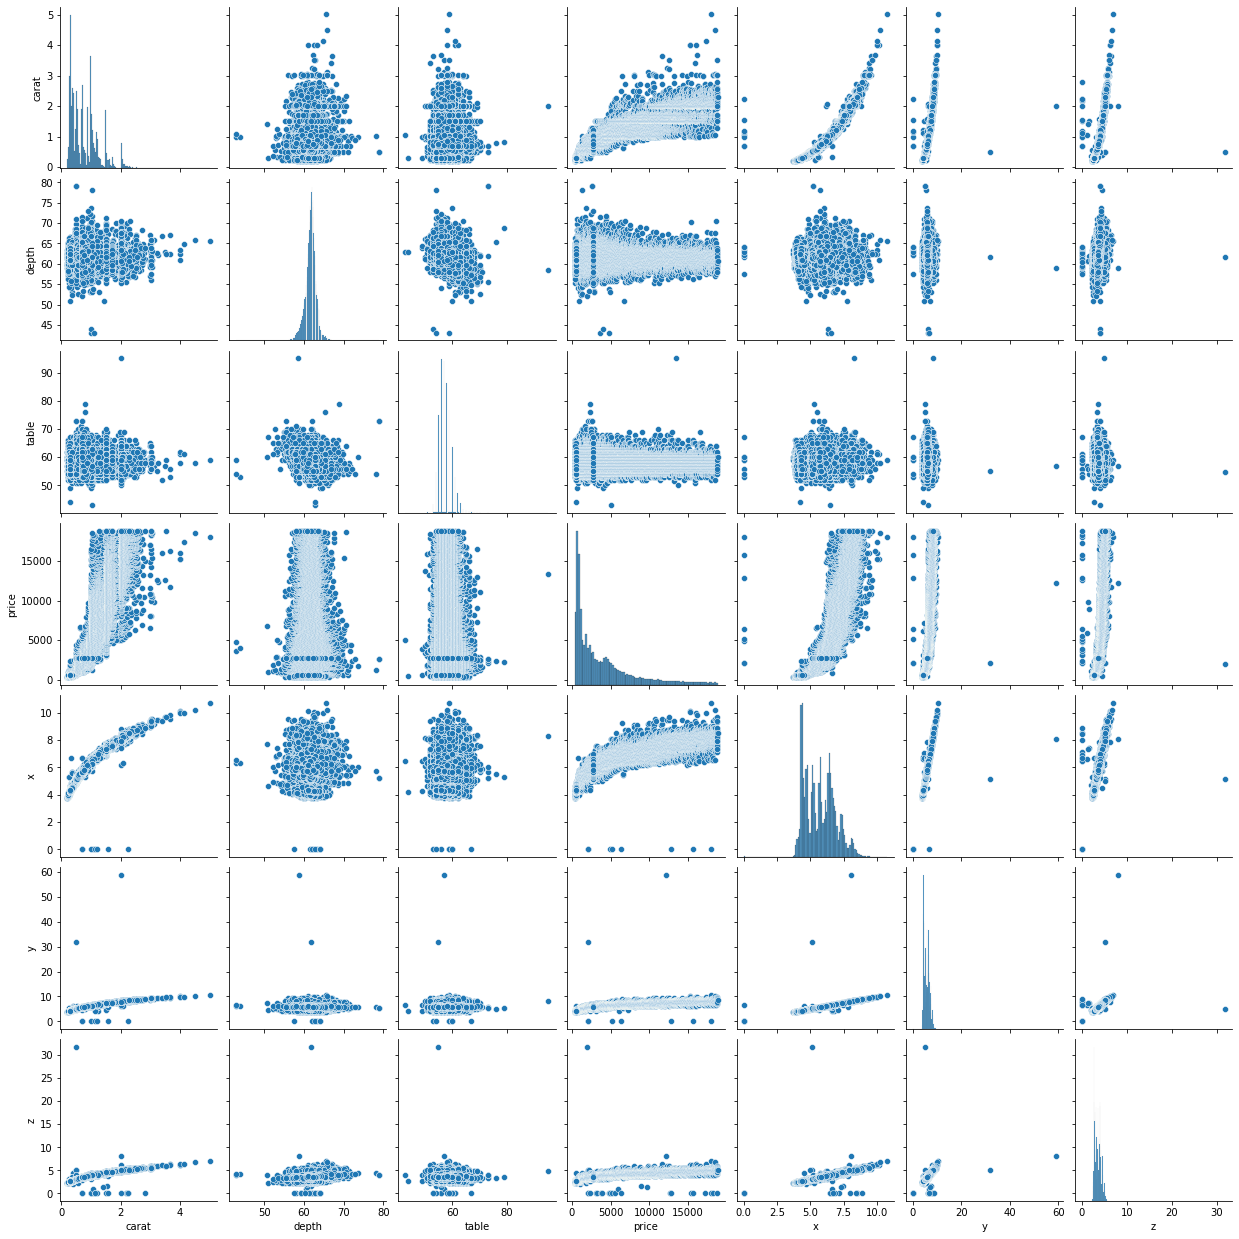

In [8]:
sns.pairplot(diamonds);

### Qualitative Data
* Bar Chart
* Pie Chart

### Ordinal Category, Univarate

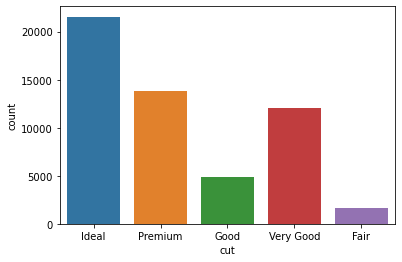

In [9]:
sns.countplot(data=diamonds, x= "cut");

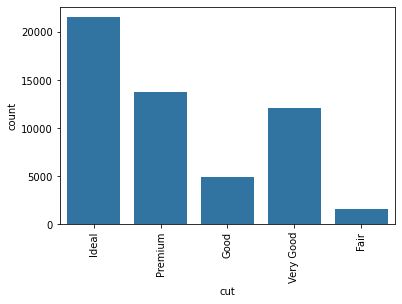

In [10]:
sns.countplot(data=diamonds, x= "cut",
              color = sns.color_palette()[0]);
plt.xticks(rotation=90);

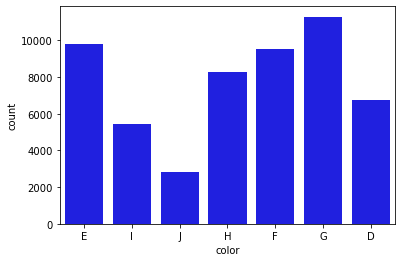

In [11]:
sns.countplot(data=diamonds, x = 'color', color = 'blue');

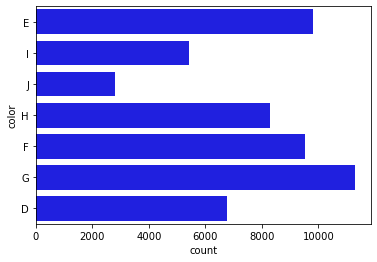

In [12]:
sns.countplot(data=diamonds, y = 'color', color = 'blue');

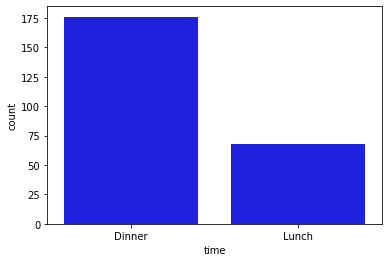

In [13]:
### prrecentage 

sns.countplot(data=tips, x='time', color ='blue');

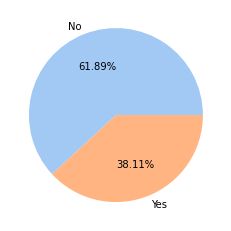

In [14]:
total = tips['smoker'].value_counts()

plt.pie(total, labels=total.index, autopct='%1.2f%%',
       colors = sns.color_palette("pastel"));


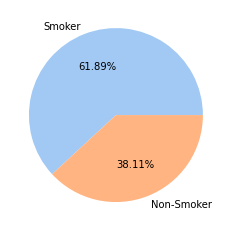

In [15]:
plt.pie(total, labels=['Smoker','Non-Smoker'], autopct='%1.2f%%',
       colors = sns.color_palette("pastel"));

### Quantitative Data
* Histogram
* Density 

<Figure size 720x720 with 0 Axes>

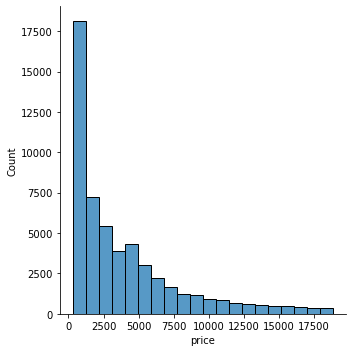

In [16]:
plt.figure(figsize=(10,10));
sns.displot(diamonds, x="price", bins=20);
#sns.displot(diamonds, x="price", bins=20, shrink=.3);

<Figure size 720x720 with 0 Axes>

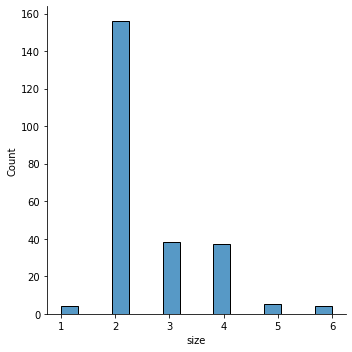

In [17]:
plt.figure(figsize=(10,10));
sns.displot(tips, x="size");

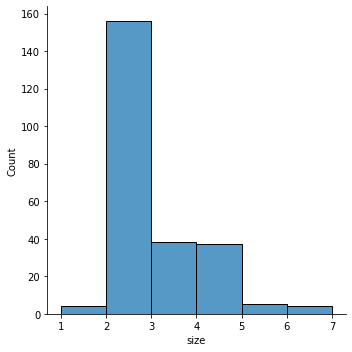

In [18]:
sns.displot(tips, x="size", bins=[1, 2, 3, 4, 5, 6, 7]);
#sns.displot(tips, x="size", discrete=True);

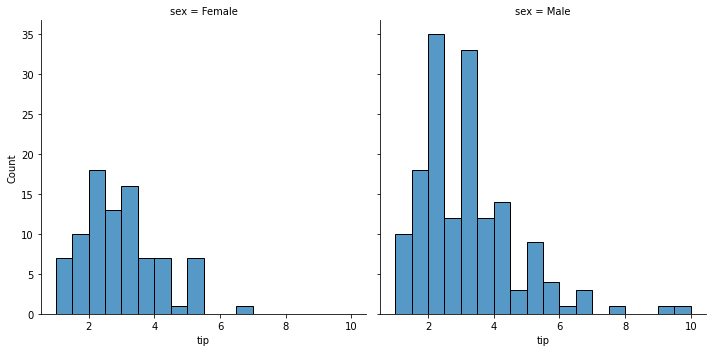

In [19]:
sns.displot(tips, x="tip", col="sex");

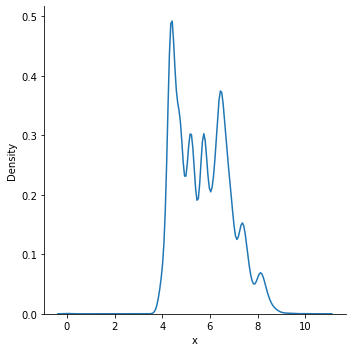

In [20]:
sns.displot(diamonds, x="x", kind="kde");

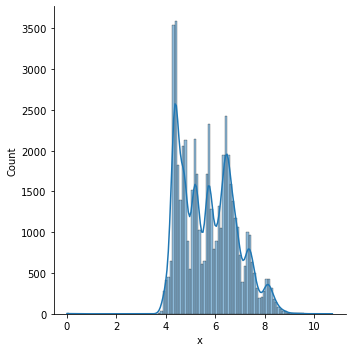

In [21]:
sns.displot(diamonds, x="x", kde=True);

## Bivariate Analysis 
* Corrolation

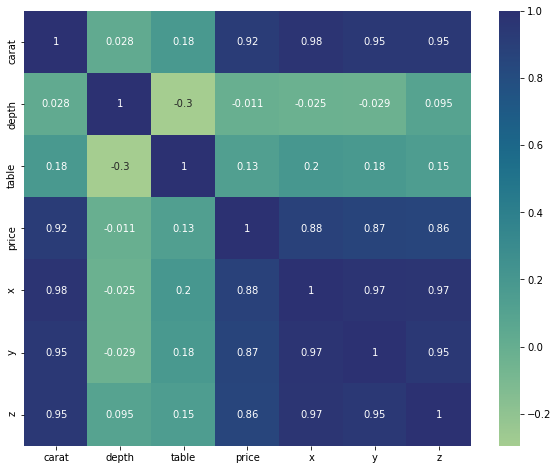

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(diamonds.corr(),annot=True, cmap="crest");

### Quantitative Vs. Quantitative 
* Scatter Plot
* Line Chart

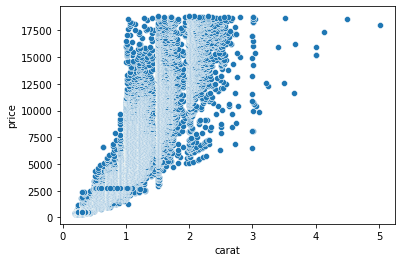

In [23]:
sns.scatterplot(data=diamonds, x="carat", y="price");

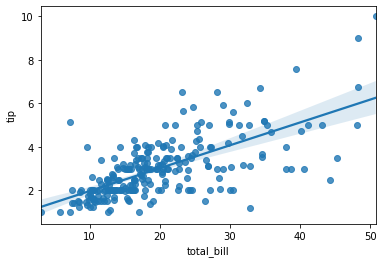

In [24]:
sns.regplot(x="total_bill", y="tip", data=tips);

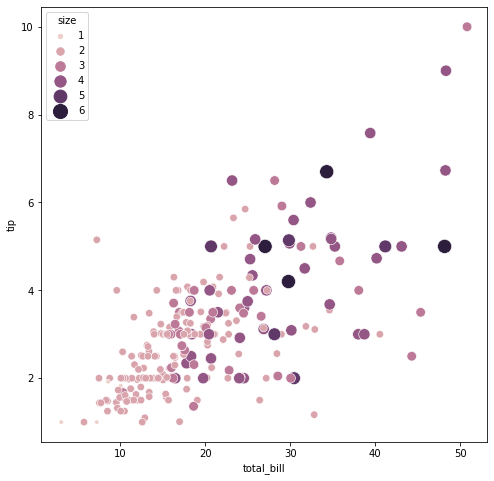

In [25]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size", size="size",sizes=(20, 200));

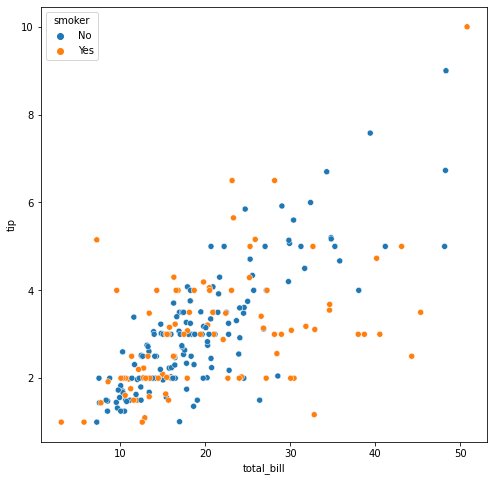

In [26]:
plt.figure(figsize=(8,8))
sns.scatterplot( data=tips, x="total_bill", y="tip", hue="smoker");

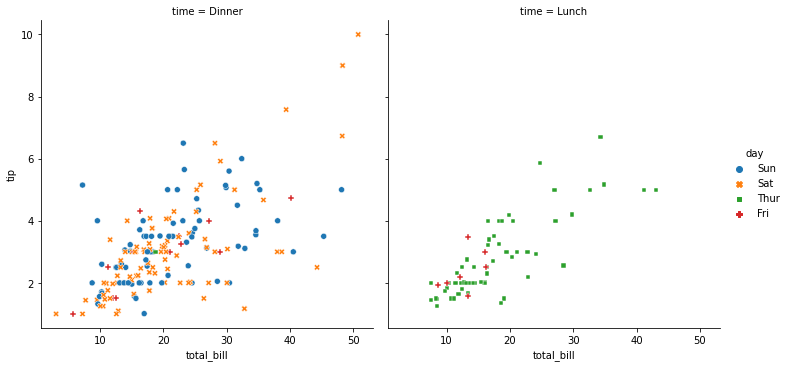

In [27]:
sns.relplot(data=tips, x="total_bill", y="tip",col="time", hue="day", style="day",kind="scatter");

In [28]:
df = tips.sample(frac=0.50)

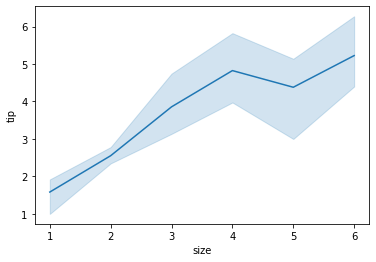

In [29]:
sns.lineplot(data=df, x="size", y="tip");

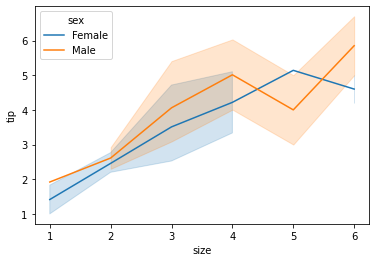

In [30]:
sns.lineplot(data=df, x="size", y="tip", hue="sex");

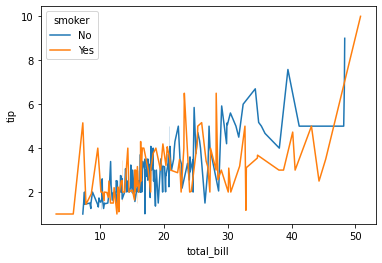

In [31]:
sns.lineplot(data=tips, x="total_bill", y="tip", hue="smoker");

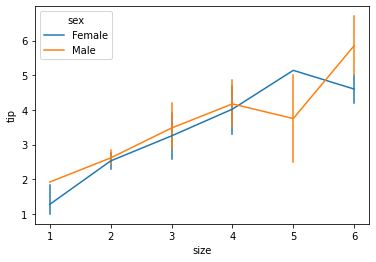

In [32]:
sns.lineplot(data=tips, x="size", y="tip", hue="sex", err_style="bars");

### Quantitative Vs. Qualitative  
* Bar Plot
* Violin Plot
* Scatter Chart
* Box plot

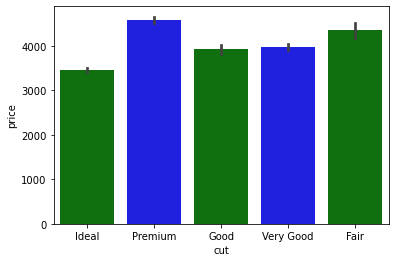

In [33]:
sns.barplot(data=diamonds, x="cut", y="price",palette=sns.color_palette(['green', 'blue']));

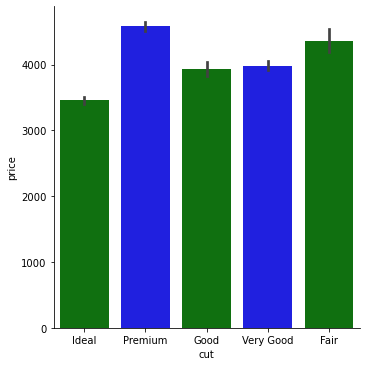

In [34]:
sns.catplot(data=diamonds, kind="bar", x="cut", y="price",palette=sns.color_palette(['green', 'blue']));

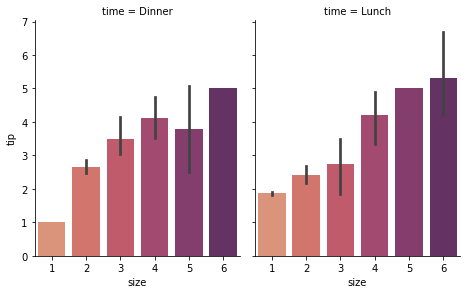

In [35]:
sns.catplot(data=tips, x="size", y="tip", col="time", kind="bar", height=4,
            aspect=.8,palette = sns.color_palette("flare"));


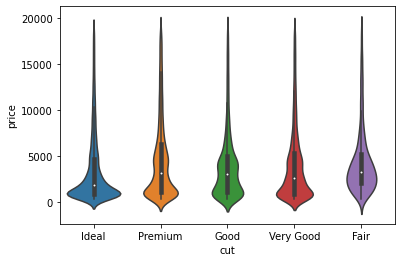

In [36]:
sns.violinplot(data=diamonds, x="cut", y="price");

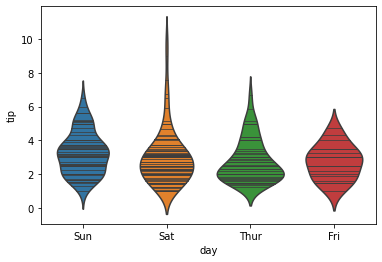

In [37]:
sns.violinplot(data=tips, x="day", y="tip", inner="stick");

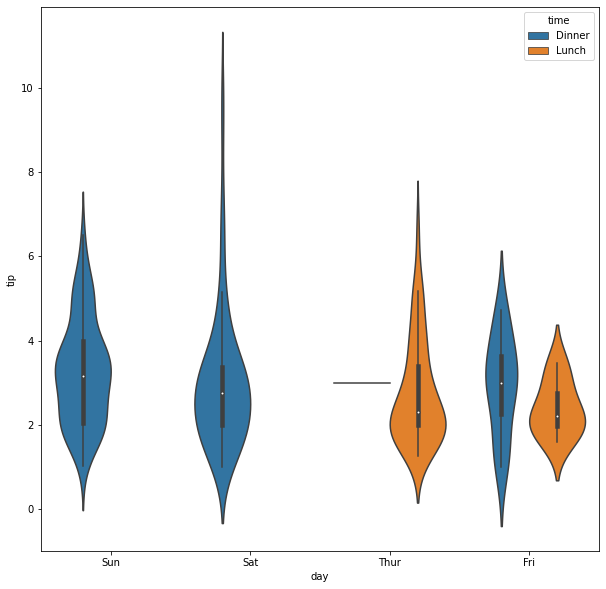

In [38]:
plt.figure(figsize=(10,10))
sns.violinplot(data=tips, x="day", y="tip", hue='time');

In [39]:
tips.groupby(['day'])['time'].value_counts()

day   time  
Fri   Dinner    12
      Lunch      7
Sat   Dinner    87
Sun   Dinner    76
Thur  Lunch     61
      Dinner     1
Name: time, dtype: int64

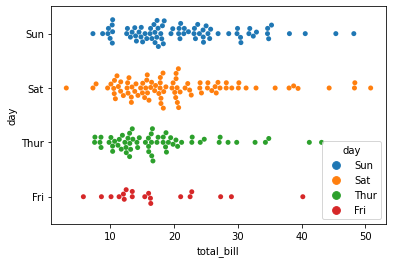

In [40]:
sns.swarmplot(data=tips, x="total_bill", y="day", hue="day");

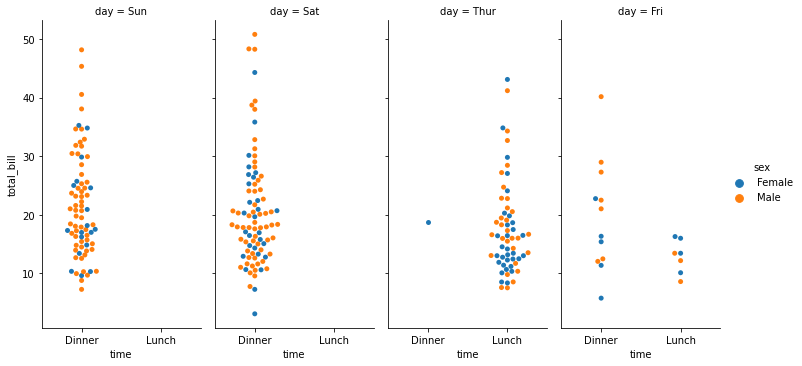

In [41]:
sns.catplot(data=tips, kind="swarm",x="time", y="total_bill", hue="sex", col="day",aspect=.5);

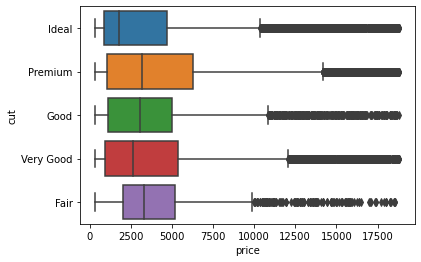

In [42]:
sns.boxplot(data=diamonds, x="price", y="cut");

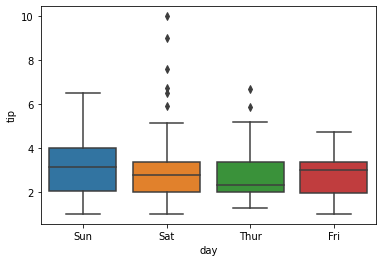

In [43]:
sns.boxplot(data=tips, y="tip", x="day" );

### Qualitative  Vs. Qualitative 
* Clusterd Histogam
* Clusterd Bar

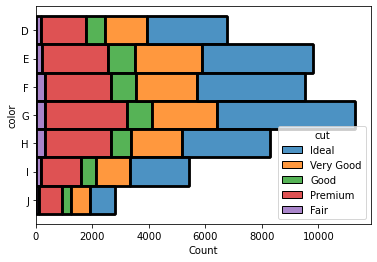

In [44]:
sns.histplot(diamonds.sort_values('color').reset_index(), y="color", hue="cut", 
             multiple="stack", alpha=0.8);

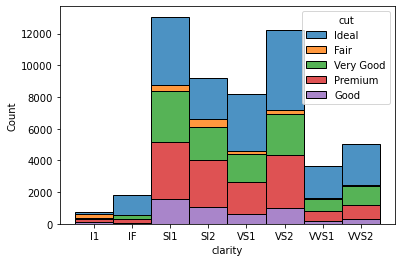

In [45]:
sns.histplot( diamonds.sort_values('clarity').reset_index(), x="clarity", hue="cut",
             multiple="stack", alpha=0.8);

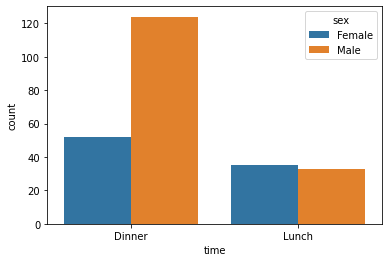

In [46]:
sns.countplot(data=tips, x = 'time',hue='sex');

### Qualitative  Vs. Quanitative 
* Clustered Bar

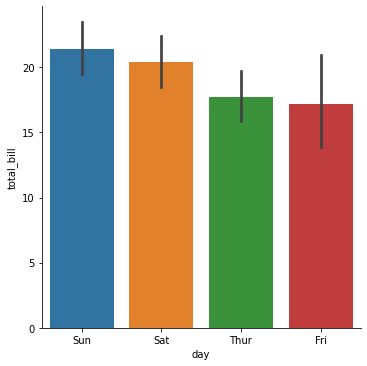

In [47]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill")

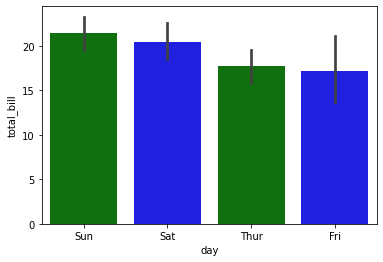

In [48]:
sns.barplot(data=tips, x="day", y="total_bill",
            palette=sns.color_palette(['green', 'blue']));

## Multivariate Analysis 
* Bar Chart
* Scatter Chart
* Line Chart

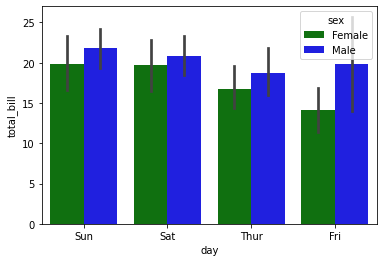

In [49]:
sns.barplot(data=tips, x="day", y="total_bill", hue = 'sex',
            palette=sns.color_palette(['green', 'blue']));

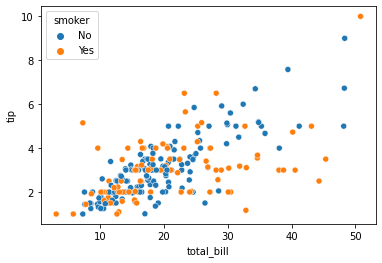

In [50]:
sns.scatterplot( data=tips, x="total_bill", y="tip", hue="smoker");

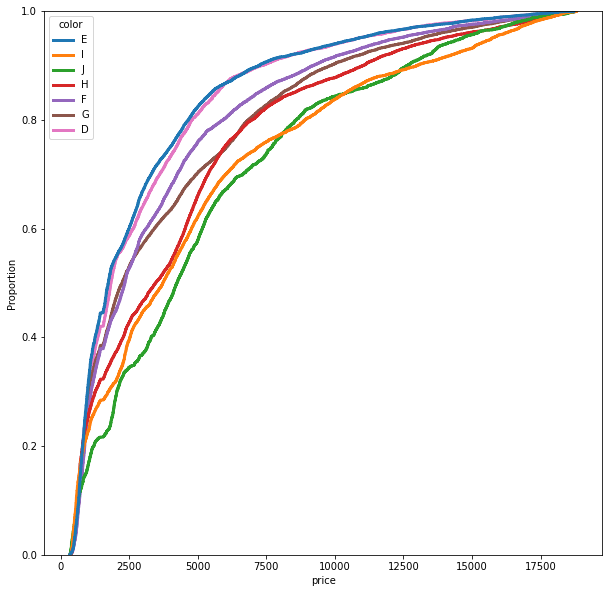

In [51]:
plt.figure(figsize=(10,10))
sns.ecdfplot(data=diamonds,x='price',hue='color',linewidth=3);